In [8]:
import tensorflow as tf #텐서프롤우 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리

In [9]:
#라이브러리에 있는 mnist 데이터세트 불러오기

Mnist = tf.keras.datasets.mnist
(x_train, t_train), (x_test, t_test) = Mnist.load_data()

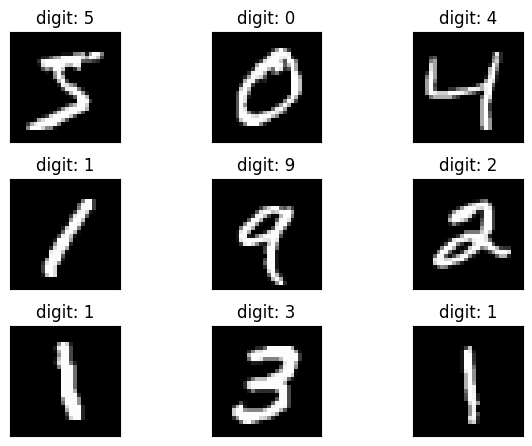

In [10]:
# mnist 9개 이미지 시각화하기(28by28 size)

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i].reshape(28,28), cmap="gray", interpolation="none")
  plt.title("digit: {}".format(t_train[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

In [11]:
# 데이터세트 정수->실수형 변경
x_train.astype('float32')
x_test.astype('float32')
# 데이터 픽셀 0~255 값을 0~1로 변경(정규화)
x_train, x_test = x_train/255, x_test/255

# 데이터 형변환(CNN 학습을 위한 차원 구조 변경)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(t_train.shape)

(60000, 28, 28, 1)
(60000,)


In [12]:
# 정답레이블 원핫인코딩

num_category = 10
t_train = tf.keras.utils.to_categorical(t_train, num_category)
t_test = tf.keras.utils.to_categorical(t_test, num_category)

#정답이 5인경우
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
# 1. 64개 필터, 커널 사이즈 3 (필터 크기), 활성화는 relu, 패딩은 원래 인풋과 같은 크기를 갖도록 0을 패딩시킵니다. (padding="same"), 입력데이터는 28x28x1 (채널 1개)를 넣는 것
# 2. 2x2 MaxPooling을 시킵니다.
# 3. 필터 개수를 128개로 늘리고 나머지는 같습니다.
# 4. 2x2 MaxPooling을 시킵니다.
# 5. 25% 확률의 Dropout을 시킵니다.
# 6. Flatten을 이용해 1D로 바꿉니다. (정답 레이블은 1D이기 때문에)
# 7. Dense를 이용하여 64개 노드로 만듭니다. (활성화 relu)
# 8. 50% 확률의 Dropout을 시킵니다.
# 9. 정답레이블의 원소가 10개이므로 Dense를 이용해 10개의 노드로 만듭니다. 최종 출력이므로 활성화함수는 softmax를 이용합니다

model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=(28,28,1)),
              tf.keras.layers.MaxPool2D(2),
              tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
              tf.keras.layers.MaxPool2D(2),
              tf.keras.layers.Dropout(0.25),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(64, activation="relu"),
              tf.keras.layers.Dropout(0.5),
              tf.keras.layers.Dense(num_category, activation="softmax")
])

In [14]:
#생성된 모델 compile
# 손실함수는 crossentropy, 기울기 최적화는 adam, 구하고자 하는 것은 accuracy
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
#모델 학습 시작

batch_size = 128
num_epoch = 10
History = model.fit(x_train, t_train,
	batch_size=batch_size, epochs=num_epoch, validation_data=(x_test, t_test))

Epoch 1/10
469/469 [==============================] - 157s 332ms/step - loss: 0.3543 - accuracy: 0.8901 - val_loss: 0.0531 - val_accuracy: 0.9826
Epoch 2/10
469/469 [==============================] - 153s 327ms/step - loss: 0.1342 - accuracy: 0.9601 - val_loss: 0.0455 - val_accuracy: 0.9849
Epoch 3/10
469/469 [==============================] - 152s 324ms/step - loss: 0.1057 - accuracy: 0.9689 - val_loss: 0.0314 - val_accuracy: 0.9897
Epoch 4/10
469/469 [==============================] - 157s 333ms/step - loss: 0.0858 - accuracy: 0.9739 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 5/10
469/469 [==============================] - 156s 334ms/step - loss: 0.0747 - accuracy: 0.9782 - val_loss: 0.0245 - val_accuracy: 0.9919
Epoch 6/10
469/469 [==============================] - 152s 324ms/step - loss: 0.0667 - accuracy: 0.9794 - val_loss: 0.0252 - val_accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 152s 324ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.0244 -

In [16]:
#테스트데이터세트 확인
score = model.evaluate(x_test, t_test, verbose=0)
print("Test loss = ", score[0])
print("Test accuracy = ", score[1])

Test loss =  0.023607812821865082
Test accuracy =  0.9923999905586243


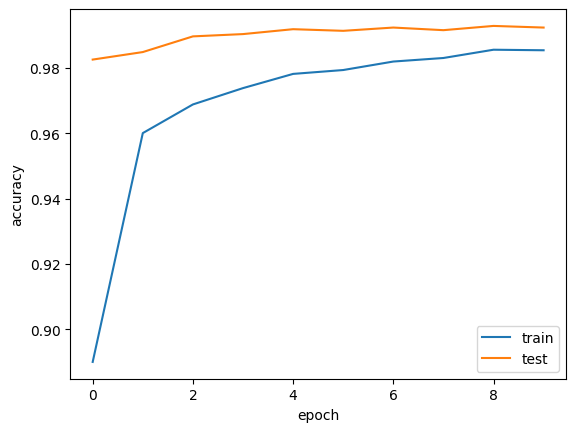

In [17]:
# 정확도 확인
plt.plot(History.history['accuracy'], label="train")
plt.plot(History.history['val_accuracy'], label="test")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

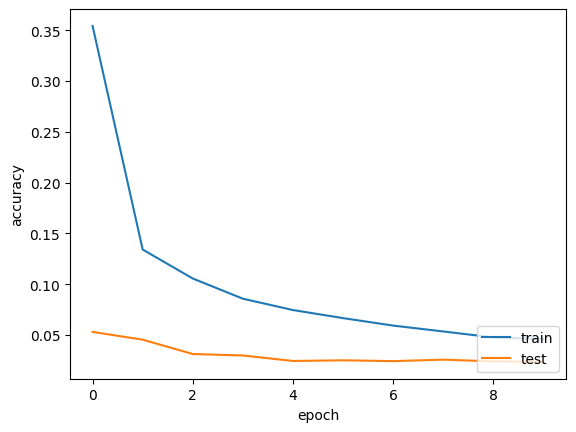

In [18]:
# 손실값 확인
plt.plot(History.history['loss'], label="train")
plt.plot(History.history['val_loss'], label="test")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()